<h1><b>Assignment #4 - K Means Clustering</b></h1>
Ryan Harris
<p><i>November 2020</i>

<h2><b>Prepare Data for Analysis</b></h2>

<h4><b><u>Load Dependencies</u></b></h4>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
    

<h4><b><u>Import, Transform and Normalize Data</u></b></h4>

In [2]:
#Import
uni_df = pd.read_csv('Universities.csv')

#Fix Column Names
uni_df.columns = ['cllg_nme','st','pblc_prvt','apps_rcd','apps_accptd','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','inst_ttn','oost_ttn','room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']

#Remove Rows With Missing Data
uni_df = uni_df.dropna()

#Create a Copy of DataFram for Normalization
uni_df_norm = uni_df.copy()

#Assign Continuous Columns to Normalize
cols_to_norm = ['apps_rcd','apps_accptd','nw_stdnt_enrlld','pct_stdnt_top_10','pct_stdt_top_25','ft_ugrd','pt_ugrd','inst_ttn','oost_ttn','room','board','addl_fees','est_bk_cst','est_prsnl','pct_fac_w_phd','stdnt_fac_ration','grad_rt']

#Normalize only Coninuous Variables
scaler = preprocessing.StandardScaler()
uni_df_norm[cols_to_norm] = scaler.fit_transform(uni_df[cols_to_norm])

#Verify mean ~0, std ~1
uni_df_norm[cols_to_norm].describe() 

,apps_rcd,apps_accptd,nw_stdnt_enrlld,pct_stdnt_top_10,pct_stdt_top_25,ft_ugrd,pt_ugrd,inst_ttn,oost_ttn,room,board,addl_fees,est_bk_cst,est_prsnl,pct_fac_w_phd,stdnt_fac_ration,grad_rt
count,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02,4.710000e+02
mean,3.535742e-19,7.307200e-18,3.241097e-17,-1.249296e-17,-5.150398e-17,-1.980016e-17,1.308225e-17,6.882911e-17,2.281732e-16,-7.920062e-17,-2.643557e-16,1.549834e-17,8.367923e-17,8.544710e-17,2.267589e-16,1.178581e-19,-3.601743e-16
std,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00,1.001063e+00
min,-7.545946e-01,-8.004321e-01,-8.240267e-01,-1.463346e+00,-2.297808e+00,-7.104950e-01,-5.157867e-01,-1.596578e+00,-2.212899e+00,-2.219315e+00,-2.809564e+00,-1.038101e+00,-2.814411e+00,-1.559102e+00,-3.916883e+00,-2.840423e+00,-2.789257e+00
25%,-5.764099e-01,-5.707325e-01,-5.649142e-01,-7.049319e-01,-7.709206e-01,-5.456245e-01,-4.636546e-01,-1.044493e+00,-7.627330e-01,-6.753055e-01,-6.568383e-01,-6.794280e-01,-2.992624e-01,-6.782043e-01,-6.131728e-01,-6.836530e-01,-6.930099e-01
50%,-3.689784e-01,-3.342360e-01,-3.692133e-01,-2.715523e-01,-8.135868e-02,-3.961905e-01,-3.228008e-01,8.190356e-02,-1.103207e-01,-1.840295e-01,-7.053408e-02,-2.785585e-01,-2.992624e-01,-1.643470e-01,1.677043e-01,-1.444606e-01,2.412710e-02
75%,1.756524e-01,1.571491e-01,1.265990e-01,4.326895e-01,6.574576e-01,1.056032e-01,4.633322e-02,6.966813e-01,6.293895e-01,6.202593e-01,5.263660e-01,3.009440e-01,3.141884e-01,4.229184e-01,8.284464e-01,6.386522e-01,7.412641e-01
max,1.104664e+01,9.702574e+00,6.134837e+00,3.683036e+00,2.184345e+00,6.020252e+00,1.362464e+01,1.940390e+00,2.211431e+00,3.642308e+00,4.272002e+00,8.067966e+00,1.098823e+01,8.057369e+00,1.789526e+00,3.809617e+00,2.892675e+00


<h2><b>k Means</b></h2>

<h4><b><u>Find Optimal k Using Elbow Method</u></b></h4>

'The optimal k is 3'

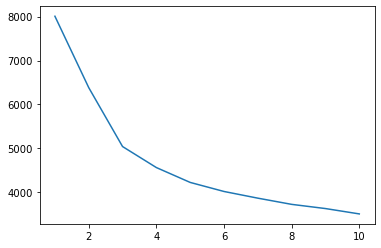

In [3]:
#Get SSE
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 6011,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(uni_df_norm.iloc[:,3:20])
    sse.append(kmeans.inertia_)

#Plot for Visual
plt.plot(range(1,11),sse)

#Use KneeLocator to confirm
kl = KneeLocator(
        range(1,11), sse, curve ="convex", direction="decreasing")
str("The optimal k is ") + str(kl.elbow)

<h4><b><u>Run k Means using Optimal k to Generate Clusters</u></b></h4>

In [4]:
#Set parameters for kmeans using kl.elbow value from above
kmeans = KMeans(
    init="random",
    n_clusters=kl.elbow,
    n_init=10,
    max_iter=300,
    random_state=6011
)
kmeans.fit(uni_df_norm.iloc[:,3:20])

#Assign clusters to original dataframe and verify
uni_df['cluster'] = kmeans.labels_
uni_df[['cllg_nme','cluster']].head()

,cllg_nme,cluster
0,Alaska Pacific University,1
2,University of Alaska Southeast,1
9,Birmingham-Southern College,2
11,Huntingdon College,1
21,Talladega College,1


<h2><b>Describe and Analyze Clusters</b></h2>

<h4><b><u>Separate into DataFrame by Cluster</u></b></h4>

In [5]:
uni_df1 = uni_df[uni_df['cluster'] == 0]
uni_df2 = uni_df[uni_df['cluster'] == 1]
uni_df3 = uni_df[uni_df['cluster'] == 2]

<h4><b><u>Describe Cluster 0</u></b></h4>

In [6]:
uni_df1.describe()

,pblc_prvt,apps_rcd,apps_accptd,nw_stdnt_enrlld,pct_stdnt_top_10,pct_stdt_top_25,ft_ugrd,pt_ugrd,inst_ttn,oost_ttn,room,board,addl_fees,est_bk_cst,est_prsnl,pct_fac_w_phd,stdnt_fac_ration,grad_rt,cluster
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.0
mean,1.106383,11102.617021,7579.617021,2996.574468,30.255319,60.638298,15197.425532,3452.978723,3583.936170,8423.574468,2180.042553,2004.191489,566.234043,569.170213,1937.191489,84.510638,16.419149,60.957447,0.0
std,0.311661,6861.966582,3974.906269,1152.967961,15.169288,17.032482,5610.451341,3441.945781,3641.517304,2934.113574,717.793235,468.950291,519.044491,125.527984,743.702186,6.199132,4.160196,14.405551,0.0
min,1.000000,4418.000000,2737.000000,1567.000000,12.000000,29.000000,8516.000000,114.000000,672.000000,4104.000000,880.000000,1120.000000,20.000000,96.000000,600.000000,70.000000,7.800000,34.000000,0.0
25%,1.000000,6920.500000,5199.500000,2122.500000,20.500000,50.500000,11263.500000,1371.000000,1894.000000,6584.000000,1661.500000,1700.000000,246.000000,500.000000,1353.000000,80.500000,13.050000,48.500000,0.0
50%,1.000000,9643.000000,6397.000000,2710.000000,25.000000,57.000000,13699.000000,2798.000000,2760.000000,7452.000000,1860.000000,1950.000000,455.000000,580.000000,1755.000000,86.000000,17.400000,63.000000,0.0
75%,1.000000,14365.000000,8848.000000,3370.000000,37.500000,72.000000,16368.000000,4283.500000,3707.000000,10218.500000,2696.500000,2233.000000,774.500000,625.000000,2321.000000,89.000000,19.400000,71.000000,0.0
max,2.000000,48094.000000,26330.000000,6392.000000,75.000000,95.000000,31643.000000,21836.000000,18420.000000,18420.000000,3990.000000,3435.000000,3247.000000,858.000000,3630.000000,93.000000,24.700000,95.000000,0.0


<u>Anaylsis for Cluster 0</u>
<br><i>This is some analysis text</i>

<h4><b><u>Describe Cluster 1</u></b></h4>

In [7]:
uni_df2.describe()

,pblc_prvt,apps_rcd,apps_accptd,nw_stdnt_enrlld,pct_stdnt_top_10,pct_stdt_top_25,ft_ugrd,pt_ugrd,inst_ttn,oost_ttn,room,board,addl_fees,est_bk_cst,est_prsnl,pct_fac_w_phd,stdnt_fac_ration,grad_rt,cluster
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.0
mean,1.697080,1668.087591,1176.525547,485.000000,18.729927,45.204380,2161.408759,606.835766,7197.901460,8310.291971,1966.624088,1901.423358,355.667883,538.923358,1352.751825,64.281022,15.043066,57.981752,1.0
std,0.460362,1676.646968,1014.391126,413.226002,10.125588,15.506179,2124.418240,765.250558,3871.480542,2671.824834,563.043471,471.602152,332.576515,170.972733,612.685182,15.395561,3.536659,16.203707,0.0
min,1.000000,77.000000,61.000000,27.000000,1.000000,9.000000,249.000000,6.000000,608.000000,1044.000000,640.000000,531.000000,10.000000,90.000000,250.000000,8.000000,6.700000,15.000000,1.0
25%,1.000000,595.500000,481.250000,212.250000,11.000000,34.000000,840.000000,122.250000,2853.500000,6392.000000,1592.500000,1609.750000,130.000000,480.000000,900.000000,56.000000,12.500000,49.000000,1.0
50%,2.000000,988.000000,790.000000,323.500000,17.000000,44.000000,1279.500000,339.500000,8312.500000,8535.000000,1920.000000,1910.000000,260.000000,500.000000,1267.000000,66.000000,14.700000,57.500000,1.0
75%,2.000000,2113.250000,1500.000000,628.000000,24.000000,55.000000,2641.750000,763.000000,10367.500000,10367.500000,2300.000000,2197.500000,462.500000,600.000000,1700.000000,75.000000,17.175000,67.000000,1.0
max,2.000000,8598.000000,5027.000000,2054.000000,56.000000,93.000000,11493.000000,5346.000000,15476.000000,15476.000000,4090.000000,3525.000000,2147.000000,2340.000000,4200.000000,103.000000,28.800000,118.000000,1.0


<u>Anaylsis for Cluster 1</u>
<br><i>This is some analysis text</i>

<h4><b><u>Describe Cluster 2</u></b></h4>

In [8]:
uni_df3.describe()

,pblc_prvt,apps_rcd,apps_accptd,nw_stdnt_enrlld,pct_stdnt_top_10,pct_stdt_top_25,ft_ugrd,pt_ugrd,inst_ttn,oost_ttn,room,board,addl_fees,est_bk_cst,est_prsnl,pct_fac_w_phd,stdnt_fac_ration,grad_rt,cluster
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.00000,150.000000,150.000000,150.000000,150.000000,150.000000,150.0
mean,1.980000,3356.673333,1953.613333,626.553333,44.266667,73.173333,2477.593333,313.586667,15265.700000,15386.486667,2698.833333,2561.646667,363.02000,560.406667,1041.480000,85.973333,11.219333,80.853333,2.0
std,0.140469,2934.965286,1397.862476,433.325684,19.805316,15.977227,1813.180787,529.123984,3197.274015,2950.657965,717.732657,499.766887,318.27858,158.524238,638.715508,8.892306,2.839527,12.078261,0.0
min,1.000000,212.000000,189.000000,91.000000,11.000000,26.000000,309.000000,1.000000,2808.000000,7000.000000,1150.000000,1622.000000,36.00000,300.000000,300.000000,56.000000,2.900000,42.000000,2.0
25%,2.000000,1435.250000,972.500000,343.250000,28.250000,60.250000,1225.250000,35.000000,12850.000000,12943.750000,2122.500000,2177.500000,146.25000,500.000000,750.000000,80.000000,9.900000,73.000000,2.0
50%,2.000000,2304.000000,1561.500000,489.000000,41.000000,73.000000,1890.000000,105.500000,15591.500000,15591.500000,2650.000000,2410.000000,267.00000,500.000000,900.000000,88.000000,11.300000,82.000000,2.0
75%,2.000000,4142.000000,2326.000000,717.500000,56.000000,84.750000,3036.500000,318.000000,18275.000000,18275.000000,3188.250000,2905.250000,450.00000,628.750000,1200.000000,93.000000,13.200000,91.000000,2.0
max,2.000000,13865.000000,7260.000000,2464.000000,96.000000,100.000000,10142.000000,4379.000000,20100.000000,20100.000000,4816.000000,4541.000000,1836.00000,1495.000000,6800.000000,100.000000,18.400000,100.000000,2.0


<u>Anaylsis for Cluster 2</u>
<br><i>This is some analysis text</i>